# overview

In [1]:
from leicaexperiment import Experiment
from PIL import Image

## rotate images

In [6]:
whole = 'experiment--2015_04_16_17_03_00'
exp_path = r"D:\MatrixScreenerImages\3.3.0_9757\ ".strip()
experiment = Experiment(exp_path + whole)
!dir $experiment.path

 Volume in drive D is DATADRIVE1
 Volume Serial Number is F805-2E08

 Directory of D:\MatrixScreenerImages\3.3.0_9757\experiment--2015_04_16_17_03_00

04/16/2015  07:03 PM    <DIR>          .
04/16/2015  07:03 PM    <DIR>          ..
04/16/2015  07:03 PM    <DIR>          AdditionalData
04/16/2015  07:03 PM    <DIR>          slide--S00
               0 File(s)              0 bytes
               4 Dir(s)  1,667,792,736,256 bytes free


In [7]:
compressed = experiment.compress(delete_tif=True)
assert len(compressed) == len(experiment.images)

In [8]:
for img in experiment.images:
    i = Image.open(img)
    i = i.rotate(270)
    i.save(img)

In [9]:
experiment.stitch()

['D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_16_17_03_00\\stitched--U00--V00--C00--Z00.png']

# check stitch shg

In [3]:
whole = 'experiment--2015_04_16_20_14_47'
exp_path = r"D:\MatrixScreenerImages\3.3.0_9757\ ".strip()
experiment = Experiment(exp_path + whole)

In [4]:
compressed = experiment.compress(delete_tif=True)
assert len(compressed) == len(experiment.images)
for img in experiment.images:
    i = Image.open(img)
    i = i.rotate(270)
    i.save(img)

In [6]:
experiment.stitch()

['D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_16_20_14_47\\stitched--U00--V00--C00--Z00.png']

In [7]:
from skimage import io
img = io.imread(_[0])

In [11]:
%matplotlib inline

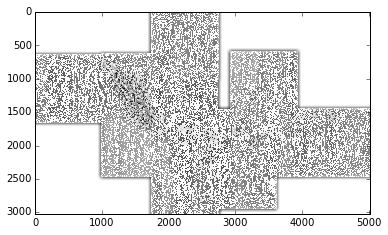

In [15]:
from skimage import filters, morphology
selem = morphology.disk(50)
io.imshow(filters.rank.equalize(img, selem))

# compress 5.14GB

In [2]:
whole = 'experiment--2015_04_16_20_21_25'
exp_path = r"D:\MatrixScreenerImages\3.3.0_9757\ ".strip()
experiment = Experiment(exp_path + whole)

In [3]:
compressed = experiment.compress(delete_tif=True)
assert len(compressed) == len(experiment.images)

In [6]:
def rot(img):
    i = Image.open(img)
    i = i.rotate(270)
    i.save(img)

In [7]:
from joblib import Parallel, delayed

In [ ]:
Parallel(n_jobs=16)(delayed(rot)(img) for img in experiment.images)